In [7]:
import tensorflow as tf
import numpy as np

In [45]:
import matplotlib.pyplot as plt

In [33]:
# random을 이용해 수 생성
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_sample = train_X.shape[0]

In [34]:
# 변수 선언
X = tf.placeholder("float")
Y = tf.placeholder("float")

# parameter 선언
W = tf.Variable(np.random.randn(), name = "weight")
b = tf.Variable(np.random.randn(), name = "bias")

- parameter : Variable 로 선언
- trainset : placeholder 로 선언 

### score function

In [35]:
# Y = WX + b
pred = tf.add(tf.multiply(W, X), b)

- feature 1개의 식으로 존재

### cost function

In [36]:
# cost function : MSE
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2*n_sample)

- reduce_sum() : 해당 축에 해당되는 값을 더한다,
- defalt : 모든 dimense 축소

### optimizer

In [37]:
# optimizer 
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [38]:
#init 
init = tf.global_variables_initializer()

- Variable은 tensor를 저장하는 공간으로 반드시 초기화가 필요하다.

### Session

In [41]:
epochs = 2000

In [51]:
# version 1
with tf.Session() as sess:
    sess.run(init)
    
    # training
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            # X : train_X, Y : train_Y
            c = sess.run(cost, feed_dict= {X:train_X, Y:train_Y})
            sess.run(optimizer, feed_dict={X: x, Y: y})
            # optimizer train시킬 시에는 sample 당 train 시킨다.
        
        # 100 단위 결과 출력
        if (epoch+1) % 100 == 0:
            print("Epoch: %4d" % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    
    print("")
    print("Optimization Finished")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), "\n")

Epoch:  100 cost= 0.297989219 W= 0.512069 b= -1.08677
Epoch:  200 cost= 0.249872968 W= 0.481776 b= -0.86884
Epoch:  300 cost= 0.212226972 W= 0.45498 b= -0.676066
Epoch:  400 cost= 0.182773471 W= 0.431275 b= -0.50554
Epoch:  500 cost= 0.159729898 W= 0.410307 b= -0.354696
Epoch:  600 cost= 0.141701713 W= 0.391759 b= -0.22126
Epoch:  700 cost= 0.127597570 W= 0.375351 b= -0.103225
Epoch:  800 cost= 0.116563745 W= 0.360837 b= 0.00118712
Epoch:  900 cost= 0.107932039 W= 0.347998 b= 0.0935492
Epoch: 1000 cost= 0.101179756 W= 0.336641 b= 0.175251
Epoch: 1100 cost= 0.095897913 W= 0.326595 b= 0.247524
Epoch: 1200 cost= 0.091766417 W= 0.317708 b= 0.311456
Epoch: 1300 cost= 0.088534936 W= 0.309847 b= 0.36801
Epoch: 1400 cost= 0.086007558 W= 0.302893 b= 0.418036
Epoch: 1500 cost= 0.084030971 W= 0.296741 b= 0.462288
Epoch: 1600 cost= 0.082485229 W= 0.2913 b= 0.501434
Epoch: 1700 cost= 0.081276566 W= 0.286486 b= 0.536062
Epoch: 1800 cost= 0.080331512 W= 0.282228 b= 0.566693
Epoch: 1900 cost= 0.079592

In [61]:
# version 2
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        c, _ = sess.run([cost, optimizer], feed_dict={X : train_X, Y : train_Y})
        
        if epoch % 100 == 0:
            print(epoch, c, sess.run(W), sess.run(b))

0 47.4162 1.33549 -1.21706
100 0.296991 0.51727 -1.08443
200 0.249532 0.486889 -0.869043
300 0.212309 0.459983 -0.678291
400 0.183112 0.436154 -0.509355
500 0.160213 0.41505 -0.359741
600 0.142252 0.39636 -0.227238
700 0.128164 0.379808 -0.109889
800 0.117115 0.365149 -0.00596171
900 0.108448 0.352166 0.0860794
1000 0.101651 0.340668 0.167594
1100 0.0963192 0.330486 0.239785
1200 0.0921375 0.321467 0.30372
1300 0.0888576 0.313481 0.360343
1400 0.086285 0.306407 0.410489
1500 0.0842673 0.300143 0.454901
1600 0.0826847 0.294595 0.494233
1700 0.0814433 0.289682 0.529067
1800 0.0804697 0.28533 0.559917
1900 0.0797061 0.281477 0.587238


- sample 하나씩도 가능하고
- sample 여러개도 가능하다.

In [47]:
# W = 0.257513, b = 0.61776

##### 순서
- parameter 정의 (Variable)
- input, output 정의 (placeholder)
- 관계식 정의
- cost function 정의
- optimizer 정의

### Result

In [52]:
import matplotlib.pyplot as plt

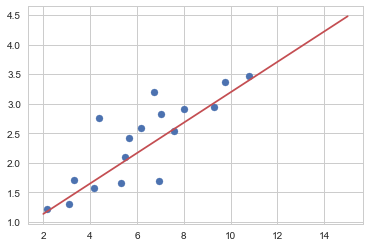

In [58]:
x = np.linspace(2, 15, 200)
y = 0.257513 * x + 0.61776

plt.scatter(train_X, train_Y)
plt.plot(x, y, c = 'r')